# Sales Analysis

## Import librearies

In [1]:
# this is to view the notebook in full with on my screen

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import sweetviz as sv

import datetime

In [3]:
# override default figure sizing
pylab.rcParams['figure.figsize']=(10,6)
sns.set(color_codes = True)

In [4]:
df = pd.read_csv('/home/gaio/Documents/GitHub/iod-linux/DATA/Online Retail Dataset.csv')

### EDA

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542014 entries, 0 to 542013
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    542014 non-null  object 
 1   StockCode    542014 non-null  object 
 2   Description  540560 non-null  object 
 3   Quantity     542014 non-null  int64  
 4   InvoiceDate  542014 non-null  object 
 5   UnitPrice    542014 non-null  float64
 6   CustomerID   406934 non-null  float64
 7   Country      542014 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [47]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132605
Country             0
year                0
month               0
day                 0
hour                0
week                0
year_month          0
Amount              0
dtype: int64

In [10]:
there are 1454 null values in this column and among those 133600 from UK and the price is 0


In [11]:
customer_null = df.loc[df['CustomerID'].isnull(),['InvoiceNo','StockCode','CustomerID','Description','Quantity','UnitPrice','Country']]
customer_null.head()
customer_null[customer_null['Country'] == 'United Kingdom'] # so there are 135080 null values in this column and among those 133600 from UK


,InvoiceNo,StockCode,CustomerID,Description,Quantity,UnitPrice,Country
680,536414,22139,NaN,NaN,56,0.00,United Kingdom
1548,536544,21773,NaN,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,United Kingdom
1549,536544,21774,NaN,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,United Kingdom
1550,536544,21786,NaN,POLKADOT RAIN HAT,4,0.85,United Kingdom
1551,536544,21787,NaN,RAIN PONCHO RETROSPOT,2,1.66,United Kingdom
...,...,...,...,...,...,...,...
541641,581498,85099B,NaN,JUMBO BAG RED RETROSPOT,5,4.13,United Kingdom
541642,581498,85099C,NaN,JUMBO BAG BAROQUE BLACK WHITE,4,4.13,United Kingdom
541643,581498,85150,NaN,LADIES & GENTLEMEN METAL SIGN,1,4.96,United Kingdom
541644,581498,85174,NaN,S/4 CACTI CANDLES,1,10.79,United Kingdom


In [12]:
customer_null.describe()

,CustomerID,Quantity,UnitPrice
count,0.0,135080.000000,135080.000000
mean,NaN,1.995573,8.076577
std,NaN,66.696153,151.900816
min,NaN,-9600.000000,-11062.060000
25%,NaN,1.000000,1.630000
50%,NaN,1.000000,3.290000
75%,NaN,3.000000,5.450000
max,NaN,5568.000000,17836.460000


Deleting all the entries that have 0 price

In [38]:
df= df[df['UnitPrice'] != 0]

In [45]:
df= df[df['Quantity'] != 0]

In [55]:
loccustomers= df[df['CustomerID'].isnull()]

In [58]:
onlinecustomers= df[df['CustomerID'] != 0]

In [63]:
dotcustomers= loccustomers[loccustomers['StockCode'] == 'DOT']

In [67]:
dotonline=onlinecustomers[onlinecustomers['StockCode'] == 'DOT']

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,539499.0,9.848863,215.391745,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,539499.0,4.632836,96.975718,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406894.0,15287.829818,1713.675405,12346.00,13953.00,15152.00,16791.00,18287.0
year,539499.0,2010.921570,0.268848,2010.00,2011.00,2011.00,2011.00,2011.0
month,539499.0,6.920634,3.364909,1.00,4.00,7.00,10.00,12.0
day,539499.0,15.652111,8.106971,1.00,10.00,15.00,22.00,31.0
hour,539499.0,13.076451,2.443580,6.00,11.00,13.00,15.00,20.0
week,539499.0,2.694428,1.942242,0.00,1.00,3.00,4.00,6.0
Amount,539499.0,18.106833,379.979557,-168469.60,3.75,9.84,17.40,168469.6


In [56]:
loccustomers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,week,year_month,Amount
1548,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-01-12 14:32:00,2.51,NaN,United Kingdom,2010,1,12,14,1,2010-01,2.51
1549,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-01-12 14:32:00,2.51,NaN,United Kingdom,2010,1,12,14,1,2010-01,5.02
1550,536544,21786,POLKADOT RAIN HAT,4,2010-01-12 14:32:00,0.85,NaN,United Kingdom,2010,1,12,14,1,2010-01,3.40
1551,536544,21787,RAIN PONCHO RETROSPOT,2,2010-01-12 14:32:00,1.66,NaN,United Kingdom,2010,1,12,14,1,2010-01,3.32
1552,536544,21790,VINTAGE SNAP CARDS,9,2010-01-12 14:32:00,1.66,NaN,United Kingdom,2010,1,12,14,1,2010-01,14.94


In [57]:
loccustomers.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,132605.0,3.150711,11.234571,-144.00,1.00,1.00,3.00,1820.00
UnitPrice,132605.0,8.227322,153.307801,-11062.06,1.63,3.29,5.79,17836.46
CustomerID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,132605.0,2010.884160,0.320034,2010.00,2011.00,2011.00,2011.00,2011.00
month,132605.0,6.852826,3.466012,1.00,4.00,7.00,10.00,12.00
day,132605.0,15.514988,8.284676,1.00,10.00,14.00,22.00,31.00
hour,132605.0,14.118457,2.613848,8.00,12.00,15.00,16.00,19.00
week,132605.0,2.429486,1.823648,0.00,1.00,2.00,4.00,6.00
Amount,132605.0,10.917251,159.428432,-17836.46,2.50,4.96,10.79,13541.33


In [59]:
onlinecustomers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,week,year_month,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,8,1,2010-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,1,2010-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,8,1,2010-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,1,2010-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,8,1,2010-01,20.34


In [61]:
onlinecustomers.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,539499.0,9.848863,215.391745,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,539499.0,4.632836,96.975718,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406894.0,15287.829818,1713.675405,12346.00,13953.00,15152.00,16791.00,18287.0
year,539499.0,2010.921570,0.268848,2010.00,2011.00,2011.00,2011.00,2011.0
month,539499.0,6.920634,3.364909,1.00,4.00,7.00,10.00,12.0
day,539499.0,15.652111,8.106971,1.00,10.00,15.00,22.00,31.0
hour,539499.0,13.076451,2.443580,6.00,11.00,13.00,15.00,20.0
week,539499.0,2.694428,1.942242,0.00,1.00,3.00,4.00,6.0
Amount,539499.0,18.106833,379.979557,-168469.60,3.75,9.84,17.40,168469.6


In [65]:
dotcustomers.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,691.0,0.997106,0.076084,-1.00,1.00,1.00,1.000,1.00
UnitPrice,691.0,281.252822,343.799690,0.35,131.52,183.55,254.425,4505.17
CustomerID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,691.0,2010.921852,0.268598,2010.00,2011.00,2011.00,2011.000,2011.00
month,691.0,6.193922,3.376821,1.00,3.00,6.00,9.000,12.00
day,691.0,15.405210,8.635832,1.00,7.00,15.00,22.000,31.00
hour,691.0,13.749638,2.605370,9.00,11.00,15.00,16.000,19.00
week,691.0,2.410999,1.862395,0.00,1.00,2.00,4.000,6.00
Amount,691.0,281.243300,343.807491,-3.29,131.52,183.55,254.425,4505.17


In [68]:
dotonline.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,707.0,0.997171,0.075218,-1.00,1.00,1.00,1.00,1.00
UnitPrice,707.0,291.728515,355.640478,0.35,131.52,185.28,264.92,4505.17
CustomerID,16.0,14096.000000,0.000000,14096.00,14096.00,14096.00,14096.00,14096.00
year,707.0,2010.923621,0.265792,2010.00,2011.00,2011.00,2011.00,2011.00
month,707.0,6.247525,3.381269,1.00,3.00,6.00,9.00,12.00
day,707.0,15.463932,8.625661,1.00,7.00,15.00,22.00,31.00
hour,707.0,13.753890,2.598533,9.00,11.00,15.00,16.00,19.00
week,707.0,2.383310,1.860246,0.00,1.00,2.00,4.00,6.00
Amount,707.0,291.719208,355.648123,-3.29,131.52,185.28,264.92,4505.17


### Convert date data to datetime

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

### Extracting data 'year', 'month', 'day', 'hour', 'day of week'


In [14]:
df['year']= df['InvoiceDate'].dt.year
df['month']=df['InvoiceDate'].dt.month
df['day']=df['InvoiceDate'].dt.day
df['hour']=df['InvoiceDate'].dt.hour
df['week']=df['InvoiceDate'].dt.dayofweek

### Extracting data 'year' and 'month'


In [15]:
df['year_month']=df['InvoiceDate'].dt.strftime('%Y-%m')

### Add the column which shows 'Amount' which is calucrated by multiplying 'Quantity' with 'UnitPrice'

In [16]:
df['Amount']=df['Quantity']*df['UnitPrice']

In [17]:
df.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,week,year_month,Amount
541994,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-09-12 12:31:00,1.95,15804.0,United Kingdom,2011,9,12,12,0,2011-09,23.40
541995,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-09-12 12:49:00,2.95,13113.0,United Kingdom,2011,9,12,12,0,2011-09,23.60
541996,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-09-12 12:49:00,1.25,13113.0,United Kingdom,2011,9,12,12,0,2011-09,30.00
541997,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-09-12 12:49:00,8.95,13113.0,United Kingdom,2011,9,12,12,0,2011-09,214.80
541998,581586,20685,DOORMAT RED RETROSPOT,10,2011-09-12 12:49:00,7.08,13113.0,United Kingdom,2011,9,12,12,0,2011-09,70.80
541999,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-09-12 12:50:00,1.95,12680.0,France,2011,9,12,12,0,2011-09,23.40
542000,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-09-12 12:50:00,1.65,12680.0,France,2011,9,12,12,0,2011-09,19.80
542001,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-09-12 12:50:00,1.65,12680.0,France,2011,9,12,12,0,2011-09,19.80
542002,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-09-12 12:50:00,3.75,12680.0,France,2011,9,12,12,0,2011-09,15.00
542003,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-09-12 12:50:00,3.75,12680.0,France,2011,9,12,12,0,2011-09,15.00


### Data Visualization

#### Total Sales by Year

In [18]:
ysales=df.groupby('year')['Amount'].sum()

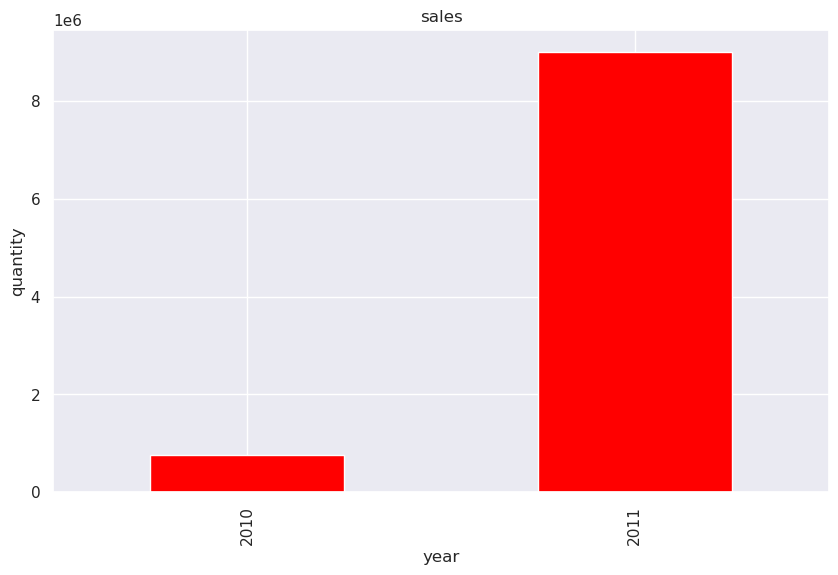

In [19]:
ysales.plot.bar(title= 'sales', xlabel='year', ylabel='quantity',color= 'red',  );

### Time series by amount

In [20]:
df1 = pd.DataFrame(df.groupby('year_month')['Amount'].sum())
df1=df1.reset_index()

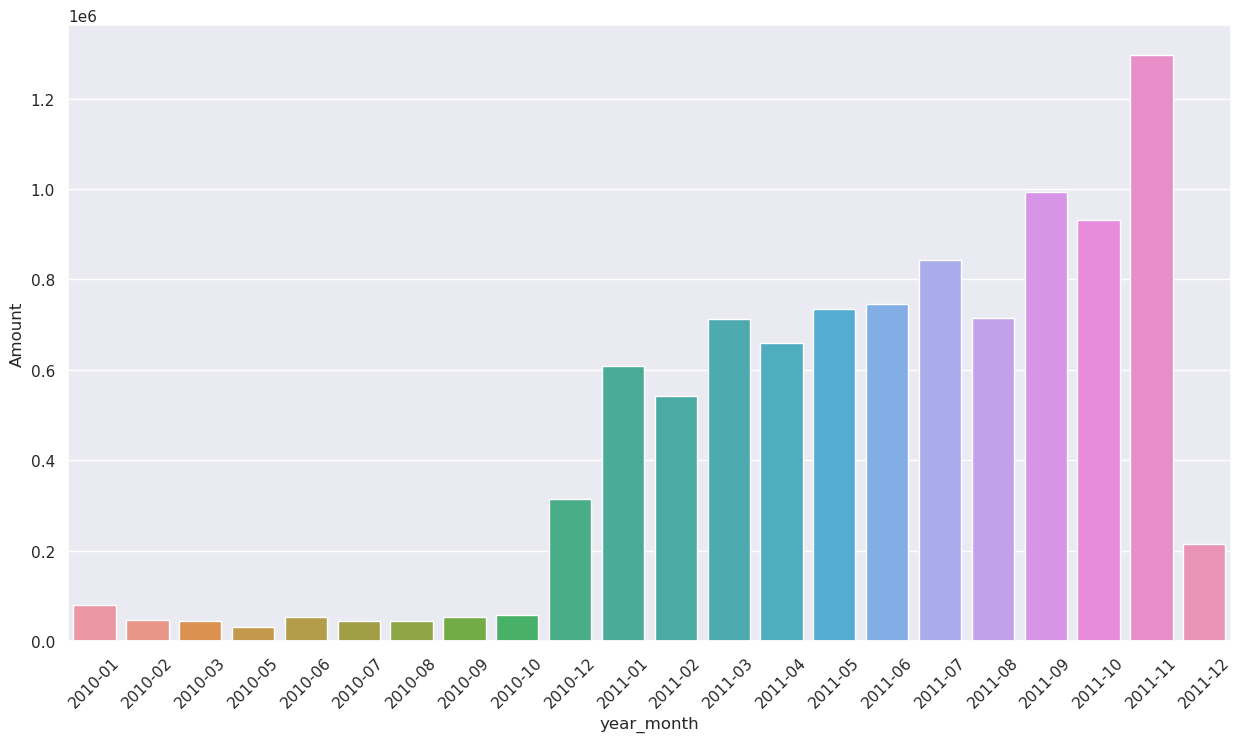

In [21]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df1, x='year_month', y = 'Amount')
plt.xticks(rotation= 45);


#####  no data avaliable for 04/2010 and 11/2010

###   Amount ratio by countries


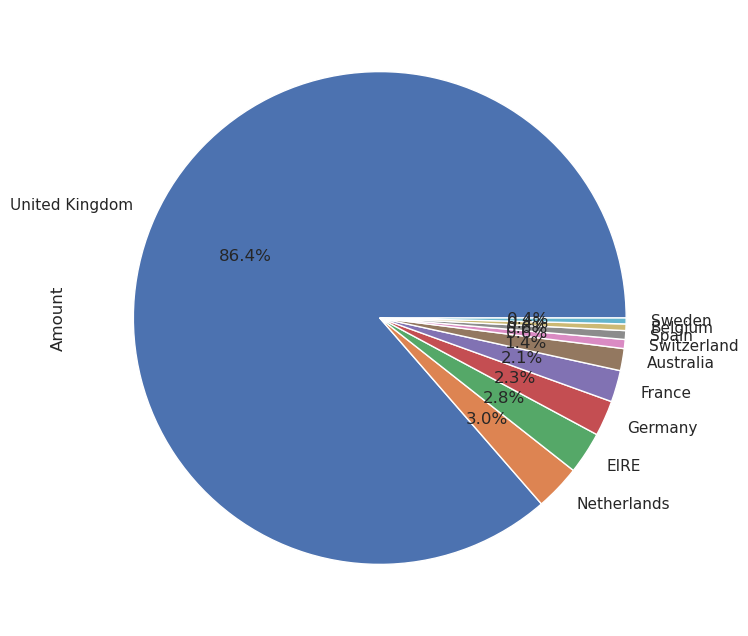

In [22]:
df.groupby('Country')['Amount'].sum().sort_values(ascending=False).head(10).plot.pie(autopct="%1.1f%%",figsize=(15, 8));

### Top 50 products which sell well


In [23]:
top50=df.groupby('StockCode')['Amount'].sum().sort_values(ascending=False).head(50)
top50=top50.reset_index()

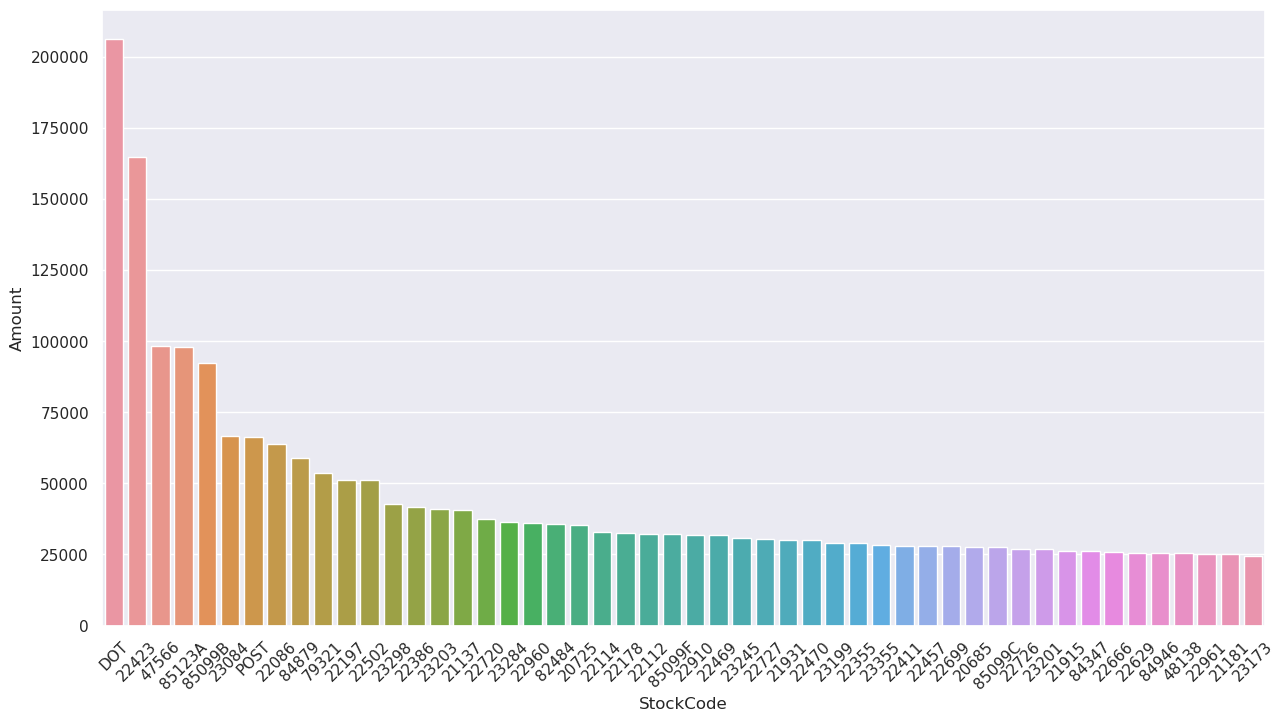

In [24]:
plt.figure(figsize=(15, 8))
sns.barplot(data=top50, x='StockCode', y = 'Amount')
plt.xticks(rotation= 45);

In [25]:
##### DOT is postage to United Kingdom and POST is postage to the rest of the World, Amazon fee is Amazon Fee

In [26]:
df['StockCode'].describe()


count     542014
unique      4093
top       85123A
freq        2313
Name: StockCode, dtype: object

In [27]:
top50.head()


,StockCode,Amount
0,DOT,206245.48
1,22423,164762.19
2,47566,98302.98
3,85123A,97894.50
4,85099B,92356.03


In [28]:
df['StockCode'].value_counts(sort=True)

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
90026A       1
84546        1
90092        1
17011A       1
90060B       1
Name: StockCode, Length: 4093, dtype: int64

### Channel Island looks too high

In [29]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day', 'hour',
       'week', 'year_month', 'Amount'],
      dtype='object')

#### Some features in this dataset that could potentially be correlated with one another include:

    Quantity and UnitPrice: It is possible that as the quantity of an item increases, the unit price may also increase.

    CustomerID and Country: It is possible that customers from the same country may have similar purchasing patterns.

    Amount and Quantity: The total amount spent on a purchase may be influenced by the quantity of items purchased.

To determine the extent of any potential correlations between these features, we could use statistical techniques such as Pearson's correlation coefficient or Spearman's rank correlation coefficient. 

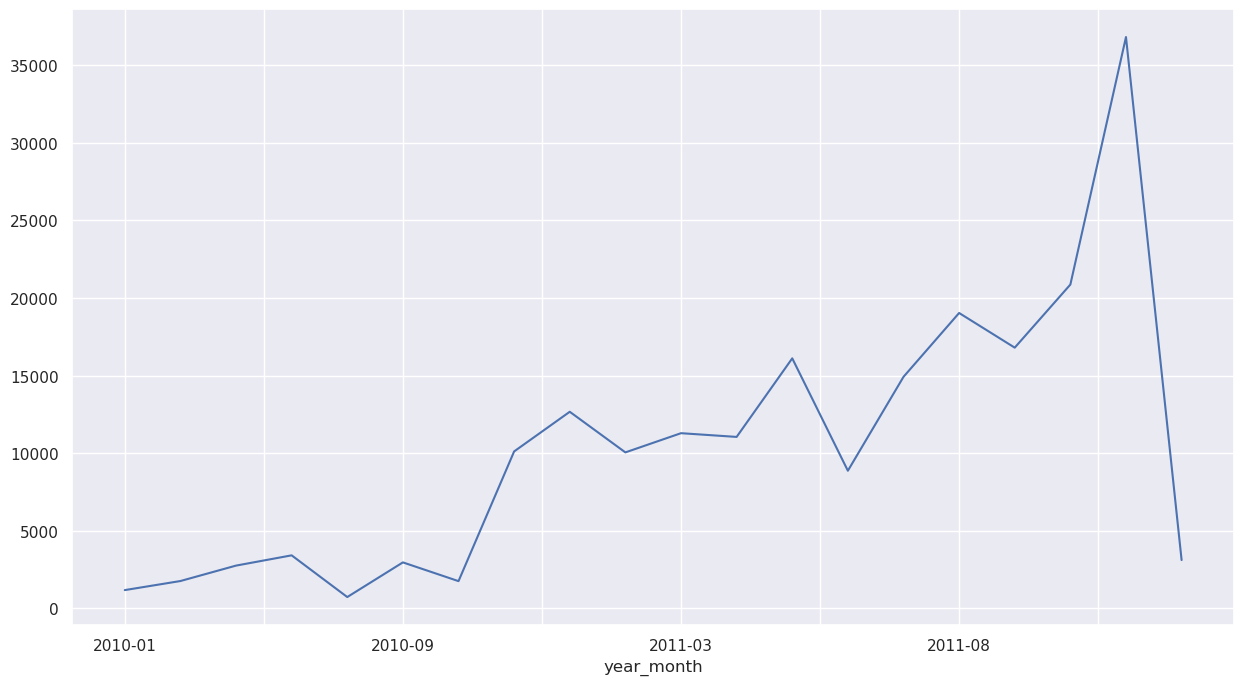

In [30]:
df[df['StockCode']=='DOT'].groupby('year_month')['Amount'].sum().plot(figsize=(15, 8));



Worst 50 products which do not sell well


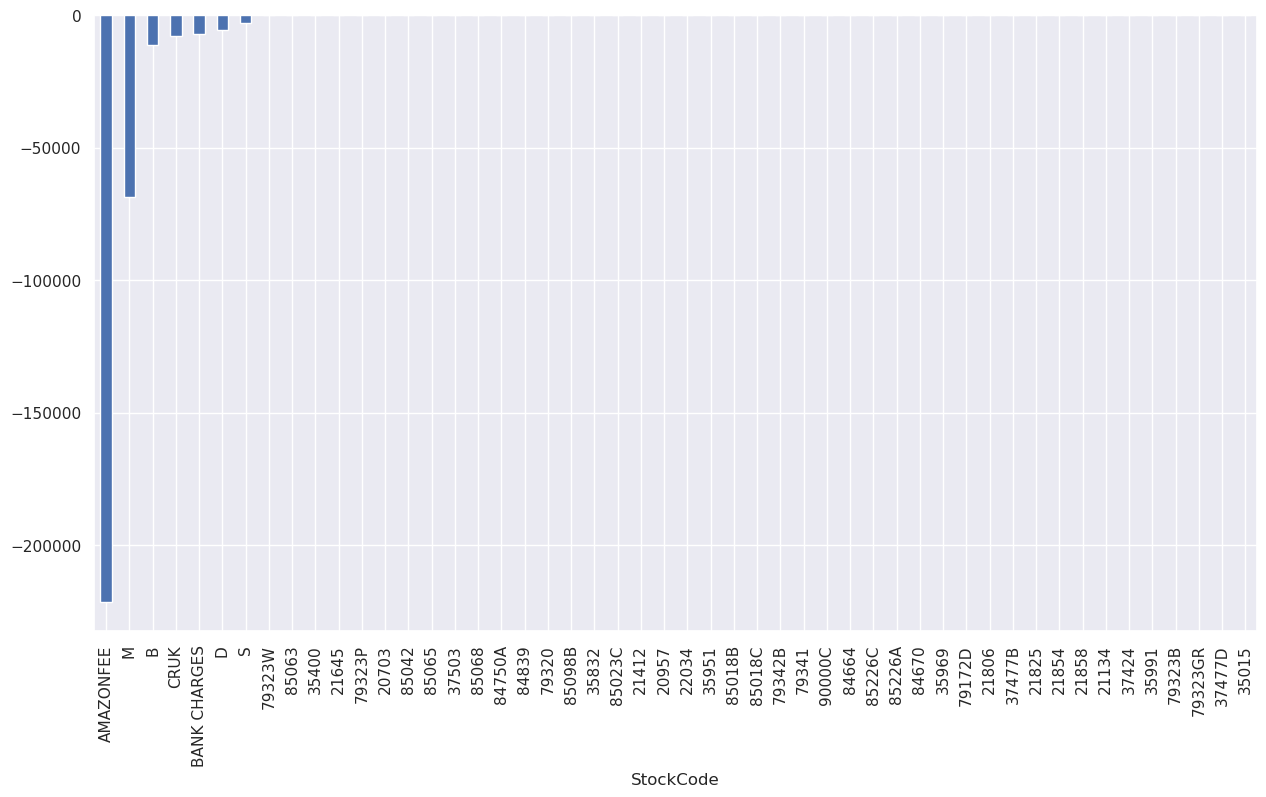

In [31]:
df.groupby('StockCode')['Amount'].sum().sort_values(ascending=True).head(50).plot.bar(figsize=(15, 8));


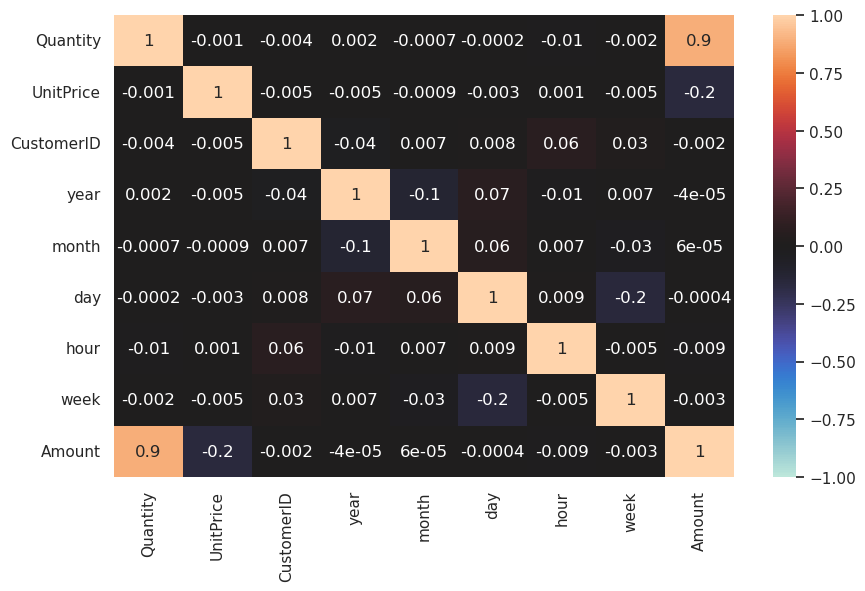

In [32]:
sns.heatmap(df.corr(), fmt='.1g',annot=True,vmin=-1, vmax=1,center=0);

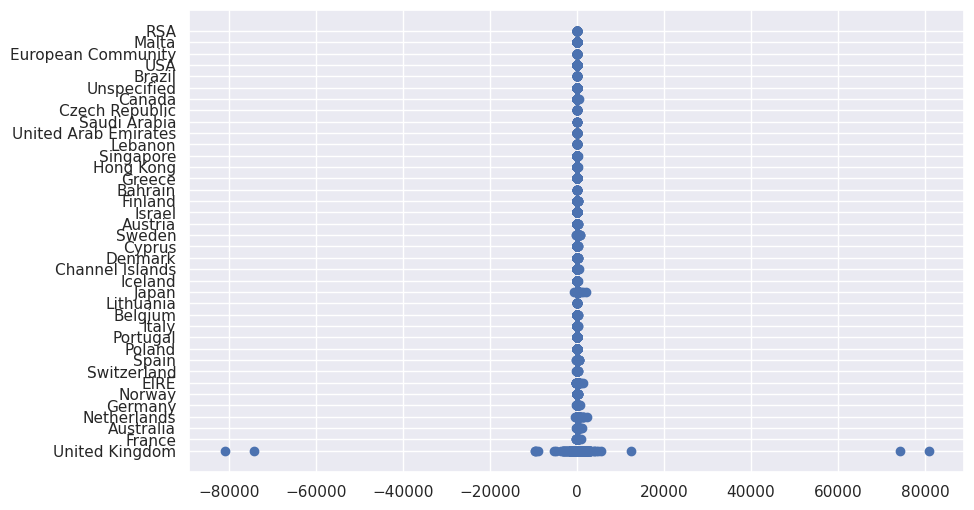

In [33]:
plt.scatter(df['Quantity'],df['Country']);

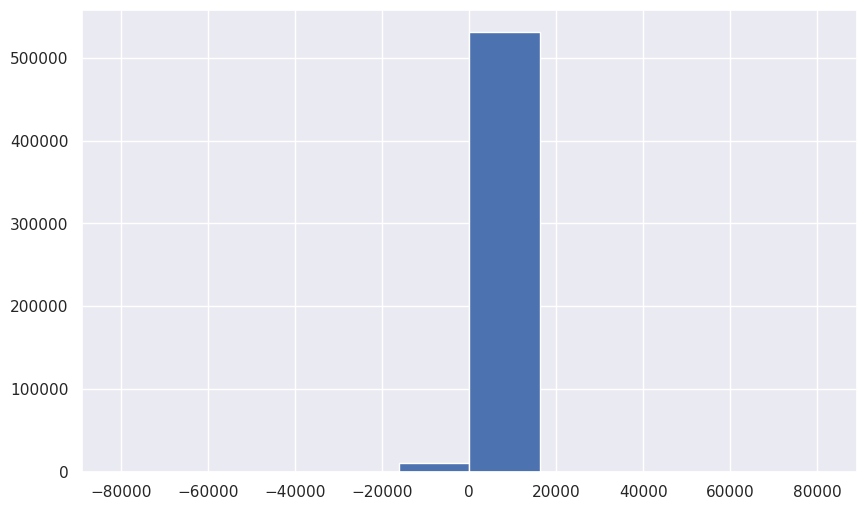

In [34]:
df['Quantity'].hist()
plt.show()

In [35]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [36]:
# Create a mask to find all rows with SONGFACTS.COM
bignumber = df['Quantity'] == '168469.6'


In [37]:
print(bignumber)

0         False
1         False
2         False
3         False
4         False
          ...  
542009    False
542010    False
542011    False
542012    False
542013    False
Name: Quantity, Length: 542014, dtype: bool
